In [1]:
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
from numpy import where
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [4]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [5]:
df.shape

(11260, 19)

In [6]:
# rename Pandas columns to lower case
df.columns= df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11158 non-null  object 
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11152 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

Due to special Characters certain float type data are being classified as Object type. Hence, Cleansing must be done by replacing all such special characters with Null-Values:

1) TENURE - '#' 116 counts; to be replaced with null.

2) GENDER - 'M or F' to be replaced with "Male or Female" respectively.

3) ACCOUNT_USER_COUNT - '@'332 counts; to be replaced with null.

4) ACCOUNT_SEGMENT - 'Super +' 47 counts; 'Regular +' 262 counts; To be replaced by 'Super Plus' & 'Regular Plus' respectively.

5) REV_PER_MONTH - '+' 689 counts; to be replaced with null. 

6) REV_GROWTH_YOY - ## ' '3 counts; to be replaced with null.

7) COUPON_USED_FOR_PAYMENT - '*' 1 count - to be replaced with '0'; '#' 1 count - to be replaced with '0'; '

 ' 1 count - to be replaced with '0'; Null values to be replaced with '0'. 8) DAY_SINCE_CC_CONNECT - ' ′1𝑐𝑜𝑢𝑛𝑡−𝑡𝑜𝑏𝑒𝑟𝑒𝑝𝑎𝑐𝑒𝑑𝑤𝑖𝑡ℎ′0′;𝑛𝑢𝑙𝑙𝑣𝑎𝑙𝑢𝑒𝑠𝑖𝑓𝑎𝑛𝑦𝑡𝑜𝑏𝑒𝑟𝑒𝑝𝑙𝑎𝑐𝑒𝑑𝑤𝑖𝑡ℎ′0′.9)𝐶𝐴𝑆𝐻𝐵𝐴𝐶𝐾−′
 ' 2 counts - to be replaced with '0', null values to be replaced with '0'. 10) LOGIN_DEVICE - '&&&&' 539 counts - to be replaced with Hybrid. null values also to be mapped as No device mapped.

In [9]:
df.tenure = df.tenure.replace(to_replace = '#', value =np.nan)

df["gender"] = df["gender"].astype(str)
df["gender"] = df["gender"].apply(lambda x: x.replace("M", "Male")) 
df["gender"] = df["gender"].apply(lambda x: x.replace("F", "Female")) 

df["account_user_count"] = df["account_user_count"].replace(to_replace = '@', value =np.nan)

df["account_segment"] = df["account_segment"].astype(str)
df["account_segment"] = df["account_segment"].apply(lambda x: x.replace("Super +", "Super Plus"))
df["account_segment"] = df["account_segment"].apply(lambda x: x.replace("Regular +", "Regular Plus"))

df["rev_per_month"] = df["rev_per_month"].replace(to_replace = '+', value =np.nan)

df["rev_growth_yoy"] = df["rev_growth_yoy"].replace(to_replace = '$', value =np.nan) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [10]:
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(to_replace = '*', value =np.nan)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(to_replace = '#', value =np.nan)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(to_replace = '$', value =np.nan)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(to_replace = '', value =np.nan)
df["coupon_used_for_payment"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [11]:
df["day_since_cc_connect"] = df["day_since_cc_connect"].replace(to_replace = '$', value =np.nan)
df["day_since_cc_connect"] = df["day_since_cc_connect"].replace(to_replace = ' ', value =np.nan)
df["day_since_cc_connect"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [12]:
df["cashback"] = df["cashback"].replace(to_replace = '$', value =np.nan)
df["cashback"] = df["cashback"].replace(to_replace = ' ', value =np.nan)
df["cashback"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [14]:
df["login_device"] = df["login_device"].astype(str)
df["login_device"] = df["login_device"].apply(lambda x: x.replace("&&&&", "hybrid"))
df["login_device"] = df["login_device"].apply(lambda x: x.replace(" ", "no device maped"))
df["login_device"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11260 non-null  int64  
 1   churn                    11260 non-null  int64  
 2   tenure                   11042 non-null  float64
 3   city_tier                11148 non-null  float64
 4   cc_contacted_ly          11158 non-null  float64
 5   payment                  11151 non-null  object 
 6   gender                   11260 non-null  object 
 7   service_score            11162 non-null  float64
 8   account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  object 
 10  cc_agent_score           11144 non-null  float64
 11  marital_status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: payment, dtype: int64


GENDER :  5
nan             108
Female          270
Male            376
Femaleemale    4178
Maleale        6328
Name: gender, dtype: int64


ACCOUNT_SEGMENT :  6
nan               97
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: marital_status, dtype: int64


LOGIN_DEVICE :  4
nan          221
hybrid       539
Computer    3018
Mobile      7482
Name: login_device, dtype: int64




In [17]:
df["gender"] = df["gender"].apply(lambda x: x.replace("Maleale", "Male")) 
df["gender"] = df["gender"].apply(lambda x: x.replace("Femaleemale", "Female"))
df["gender"] = df["gender"].apply(lambda x: x.replace("nan", "Male"))

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: payment, dtype: int64


GENDER :  2
Female    4448
Male      6812
Name: gender, dtype: int64


ACCOUNT_SEGMENT :  6
nan               97
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: marital_status, dtype: int64


LOGIN_DEVICE :  4
nan          221
hybrid       539
Computer    3018
Mobile      7482
Name: login_device, dtype: int64




In [19]:
df.isnull().sum()

accountid                    0
churn                        0
tenure                     218
city_tier                  112
cc_contacted_ly            102
payment                    109
gender                       0
service_score               98
account_user_count         444
account_segment              0
cc_agent_score             116
marital_status             212
rev_per_month              791
complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
day_since_cc_connect       358
cashback                   473
login_device                 0
dtype: int64

In [20]:
for column in df[['gender','account_segment','marital_status','login_device','payment','city_tier']]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode[0])

In [21]:
df.isnull().sum()

accountid                    0
churn                        0
tenure                     218
city_tier                    0
cc_contacted_ly            102
payment                      0
gender                       0
service_score               98
account_user_count         444
account_segment              0
cc_agent_score             116
marital_status               0
rev_per_month              791
complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
day_since_cc_connect       358
cashback                   473
login_device                 0
dtype: int64

In [22]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: payment, dtype: int64


GENDER :  2
Female    4448
Male      6812
Name: gender, dtype: int64


ACCOUNT_SEGMENT :  6
nan               97
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     6072
Name: marital_status, dtype: int64


LOGIN_DEVICE :  4
nan          221
hybrid       539
Computer    3018
Mobile      7482
Name: login_device, dtype: int64




In [23]:
df["account_segment"] = df["account_segment"].apply(lambda x: x.replace("nan", "Regular Plus"))
df["login_device"] = df["login_device"].apply(lambda x: x.replace("nan", "Mobile"))

In [24]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: payment, dtype: int64


GENDER :  2
Female    4448
Male      6812
Name: gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4221
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     6072
Name: marital_status, dtype: int64


LOGIN_DEVICE :  3
hybrid       539
Computer    3018
Mobile      7703
Name: login_device, dtype: int64




In [25]:
df.head()

accountid  churn  tenure  city_tier  cc_contacted_ly      payment  gender  \
0      20000      1     4.0        3.0              6.0   Debit Card  Female   
1      20001      1     0.0        1.0              8.0          UPI    Male   
2      20002      1     0.0        1.0             30.0   Debit Card    Male   
3      20003      1     0.0        3.0             15.0   Debit Card    Male   
4      20004      1     0.0        1.0             12.0  Credit Card    Male   

   service_score  account_user_count account_segment  cc_agent_score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  marital_status  rev_per_month  complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  day_since_cc_connect  cashback login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

In [26]:
df.isna().sum().sort_values(ascending=False)

rev_per_month              791
cashback                   473
account_user_count         444
day_since_cc_connect       358
complain_ly                357
tenure                     218
cc_agent_score             116
cc_contacted_ly            102
service_score               98
coupon_used_for_payment      3
rev_growth_yoy               3
login_device                 0
churn                        0
city_tier                    0
account_segment              0
payment                      0
gender                       0
marital_status               0
accountid                    0
dtype: int64

In [27]:
df.describe().T

count          mean          std      min  \
accountid                11260.0  25629.500000  3250.626350  20000.0   
churn                    11260.0      0.168384     0.374223      0.0   
tenure                   11042.0     11.025086    12.879782      0.0   
city_tier                11260.0      1.647425     0.912763      1.0   
cc_contacted_ly          11158.0     17.867091     8.853269      4.0   
service_score            11162.0      2.902526     0.725584      0.0   
account_user_count       10816.0      3.692862     1.022976      1.0   
cc_agent_score           11144.0      3.066493     1.379772      1.0   
rev_per_month            10469.0      6.362594    11.909686      1.0   
complain_ly              10903.0      0.285334     0.451594      0.0   
rev_growth_yoy           11257.0     16.193391     3.757721      4.0   
coupon_used_for_payment  11257.0      1.790619     1.969551      0.0   
day_since_cc_connect     10902.0      4.633187     3.697637      0.0   
cashback                 10787.0    196.236370   178.660514      0.0   

                              25%       50%       75%      max  
accountid                22814.75  25629.50  28444.25  31259.0  
churn                        0.00      0.00      0.00      1.0  
tenure                       2.00      9.00     16.00     99.0  
city_tier                    1.00      1.00      3.00      3.0  
cc_contacted_ly             11.00     16.00     23.00    132.0  
service_score                2.00      3.00      3.00      5.0  
account_user_count           3.00      4.00      4.00      6.0  
cc_agent_score               2.00      3.00      4.00      5.0  
rev_per_month                3.00      5.00      7.00    140.0  
complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
day_since_cc_connect         2.00      3.00      8.00     47.0  
cashback                   147.21    165.25    200.01   1997.0

In [28]:
df['tenure']=df['tenure'].fillna(11.025086)
df['rev_per_month']= df['rev_per_month'].fillna(6.362594)
df['cashback']= df['cashback'].fillna(178.660514)
# Mean Imputation

In [29]:
df['account_user_count']= df['account_user_count'].fillna(4.00)
# Median Imputation

In [30]:
df['day_since_cc_connect']= df['day_since_cc_connect'].fillna(0)
df['complain_ly']= df['complain_ly'].fillna(0)
df['cc_agent_score']= df['cc_agent_score'].fillna(0)
df['cc_contacted_ly']= df['cc_contacted_ly'].fillna(0)
# Fill with Zero's

In [31]:
df.isna().sum().sort_values(ascending=False)

service_score              98
coupon_used_for_payment     3
rev_growth_yoy              3
login_device                0
churn                       0
tenure                      0
city_tier                   0
cc_contacted_ly             0
payment                     0
gender                      0
account_segment             0
account_user_count          0
cashback                    0
cc_agent_score              0
marital_status              0
rev_per_month               0
complain_ly                 0
day_since_cc_connect        0
accountid                   0
dtype: int64

In [32]:
df.shape

(11260, 19)

In [33]:
df.dropna(axis=0, how='any', inplace=True)

In [34]:
df.shape

(11156, 19)

In [35]:
df.isna().sum().sort_values(ascending=False)

login_device               0
account_user_count         0
churn                      0
tenure                     0
city_tier                  0
cc_contacted_ly            0
payment                    0
gender                     0
service_score              0
account_segment            0
cashback                   0
cc_agent_score             0
marital_status             0
rev_per_month              0
complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
day_since_cc_connect       0
accountid                  0
dtype: int64

In [36]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [37]:
df.describe().T

count          mean          std      min  \
accountid                11156.0  25626.982252  3252.246660  20000.0   
churn                    11156.0      0.168519     0.374343      0.0   
tenure                   11156.0     11.025499    12.784782      0.0   
city_tier                11156.0      1.647902     0.912926      1.0   
cc_contacted_ly          11156.0     17.710649     8.979383      0.0   
service_score            11156.0      2.902743     0.725626      0.0   
account_user_count       11156.0      3.705719     1.004824      1.0   
cc_agent_score           11156.0      3.033076     1.408013      0.0   
rev_per_month            11156.0      6.376104    11.533612      1.0   
complain_ly              11156.0      0.276264     0.447169      0.0   
rev_growth_yoy           11156.0     16.188688     3.757148      4.0   
coupon_used_for_payment  11156.0      1.790427     1.971241      0.0   
day_since_cc_connect     11156.0      4.483148     3.730474      0.0   
cashback                 11156.0    195.665063   175.650964      0.0   

                              25%        50%         75%      max  
accountid                22804.75  25625.500  28444.2500  31259.0  
churn                        0.00      0.000      0.0000      1.0  
tenure                       2.00      9.000     16.0000     99.0  
city_tier                    1.00      1.000      3.0000      3.0  
cc_contacted_ly             11.00     16.000     23.0000    132.0  
service_score                2.00      3.000      3.0000      5.0  
account_user_count           3.00      4.000      4.0000      6.0  
cc_agent_score               2.00      3.000      4.0000      5.0  
rev_per_month                3.00      5.000      7.0000    140.0  
complain_ly                  0.00      0.000      1.0000      1.0  
rev_growth_yoy              13.00     15.000     19.0000     28.0  
coupon_used_for_payment      1.00      1.000      2.0000     16.0  
day_since_cc_connect         2.00      3.000      7.0000     47.0  
cashback                   147.89    167.555    197.2575   1997.0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11156 non-null  int64  
 1   churn                    11156 non-null  int64  
 2   tenure                   11156 non-null  float64
 3   city_tier                11156 non-null  float64
 4   cc_contacted_ly          11156 non-null  float64
 5   payment                  11156 non-null  object 
 6   gender                   11156 non-null  object 
 7   service_score            11156 non-null  float64
 8   account_user_count       11156 non-null  float64
 9   account_segment          11156 non-null  object 
 10  cc_agent_score           11156 non-null  float64
 11  marital_status           11156 non-null  object 
 12  rev_per_month            11156 non-null  float64
 13  complain_ly              11156 non-null  float64
 14  rev_growth_yoy        

In [39]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

14

In [40]:
def univariateAnalysis_numeric(column,nbins):
       
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_num[column], kde=False, color='g');
    plt.show()
    

Distribution of accountid
----------------------------------------------------------------------------


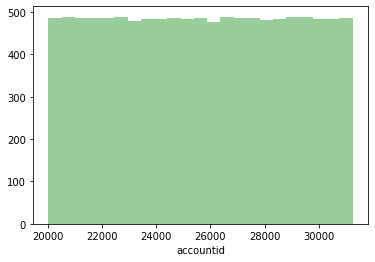

Distribution of churn
----------------------------------------------------------------------------


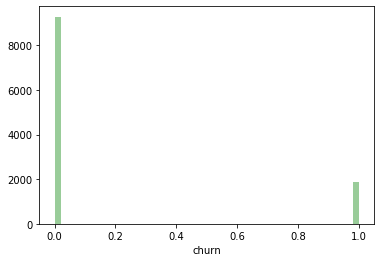

Distribution of tenure
----------------------------------------------------------------------------


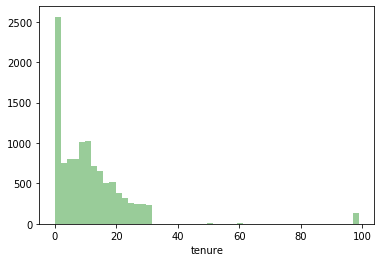

Distribution of city_tier
----------------------------------------------------------------------------


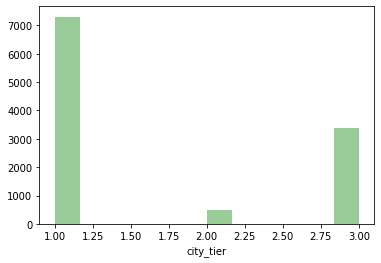

Distribution of cc_contacted_ly
----------------------------------------------------------------------------


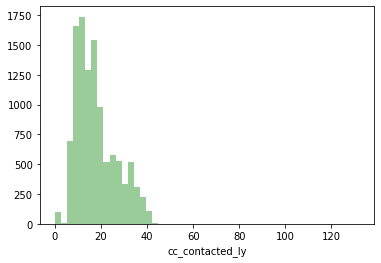

Distribution of service_score
----------------------------------------------------------------------------


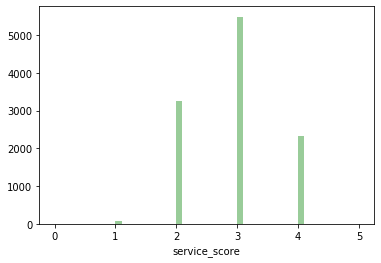

Distribution of account_user_count
----------------------------------------------------------------------------


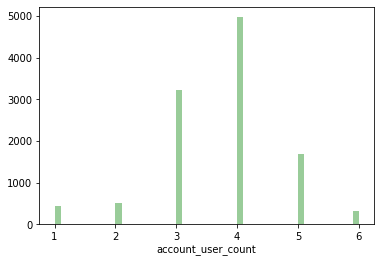

Distribution of cc_agent_score
----------------------------------------------------------------------------


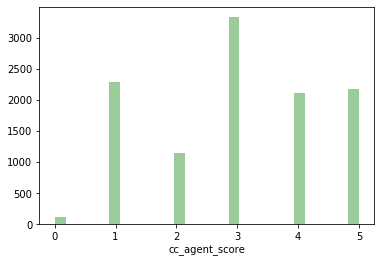

Distribution of rev_per_month
----------------------------------------------------------------------------


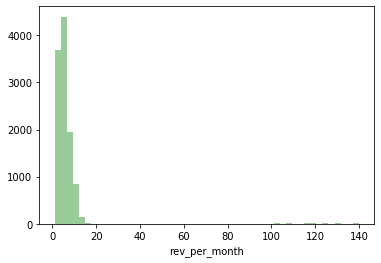

Distribution of complain_ly
----------------------------------------------------------------------------


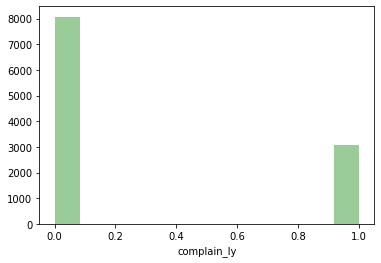

Distribution of rev_growth_yoy
----------------------------------------------------------------------------


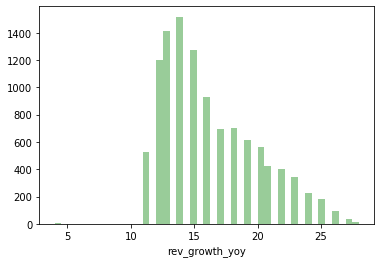

Distribution of coupon_used_for_payment
----------------------------------------------------------------------------


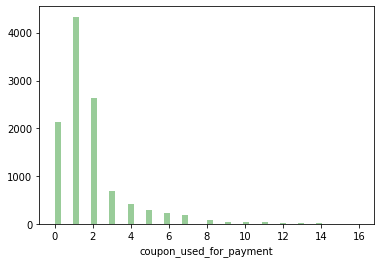

Distribution of day_since_cc_connect
----------------------------------------------------------------------------


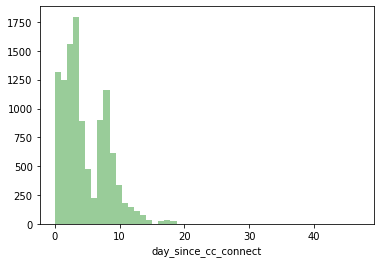

Distribution of cashback
----------------------------------------------------------------------------


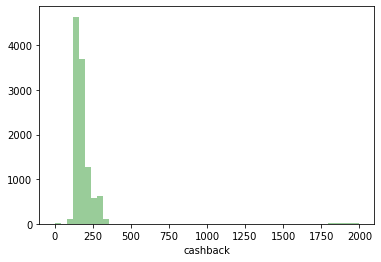

In [41]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [42]:
def univariateAnalysis_numeric_1(column,nbins):
       
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()
   

BoxPlot of accountid
----------------------------------------------------------------------------


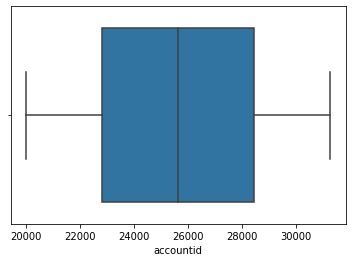

BoxPlot of churn
----------------------------------------------------------------------------


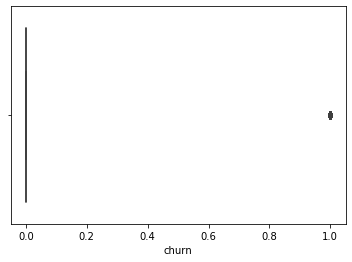

BoxPlot of tenure
----------------------------------------------------------------------------


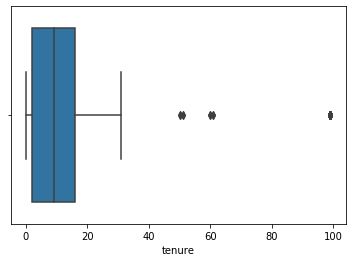

BoxPlot of city_tier
----------------------------------------------------------------------------


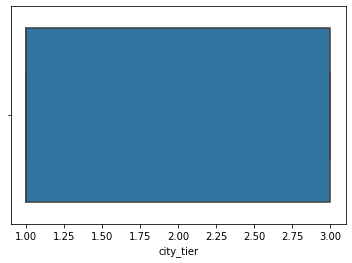

BoxPlot of cc_contacted_ly
----------------------------------------------------------------------------


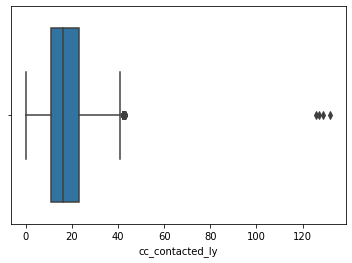

BoxPlot of service_score
----------------------------------------------------------------------------


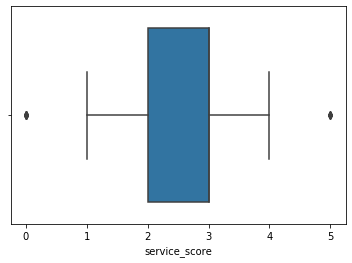

BoxPlot of account_user_count
----------------------------------------------------------------------------


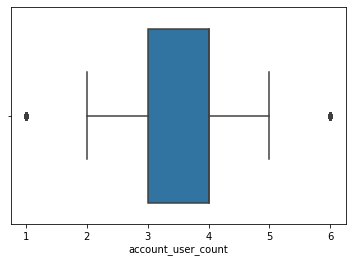

BoxPlot of cc_agent_score
----------------------------------------------------------------------------


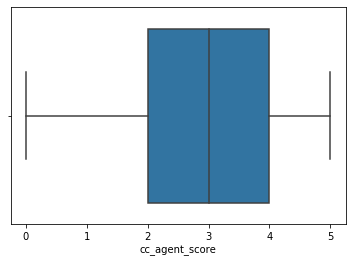

BoxPlot of rev_per_month
----------------------------------------------------------------------------


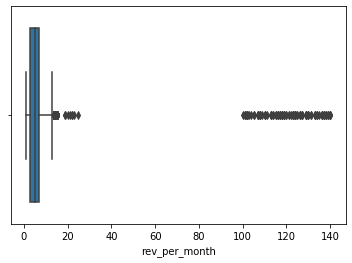

BoxPlot of complain_ly
----------------------------------------------------------------------------


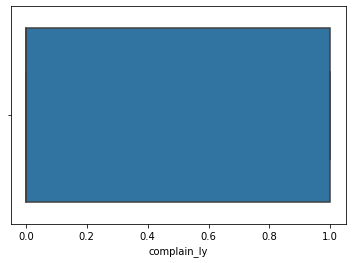

BoxPlot of rev_growth_yoy
----------------------------------------------------------------------------


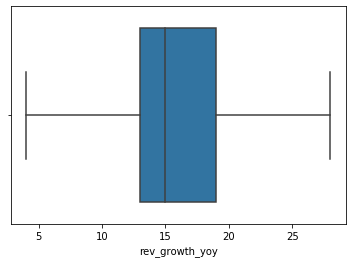

BoxPlot of coupon_used_for_payment
----------------------------------------------------------------------------


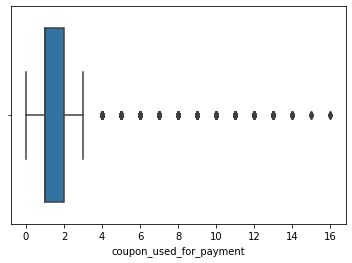

BoxPlot of day_since_cc_connect
----------------------------------------------------------------------------


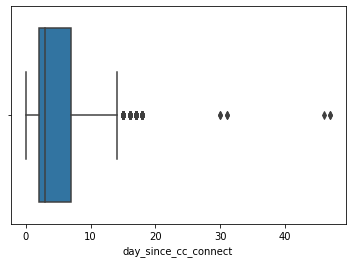

BoxPlot of cashback
----------------------------------------------------------------------------


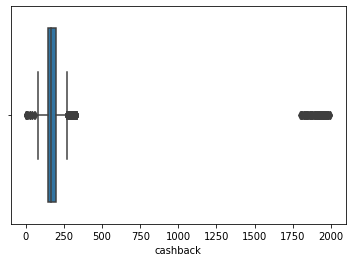

In [43]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric_1(x,20)

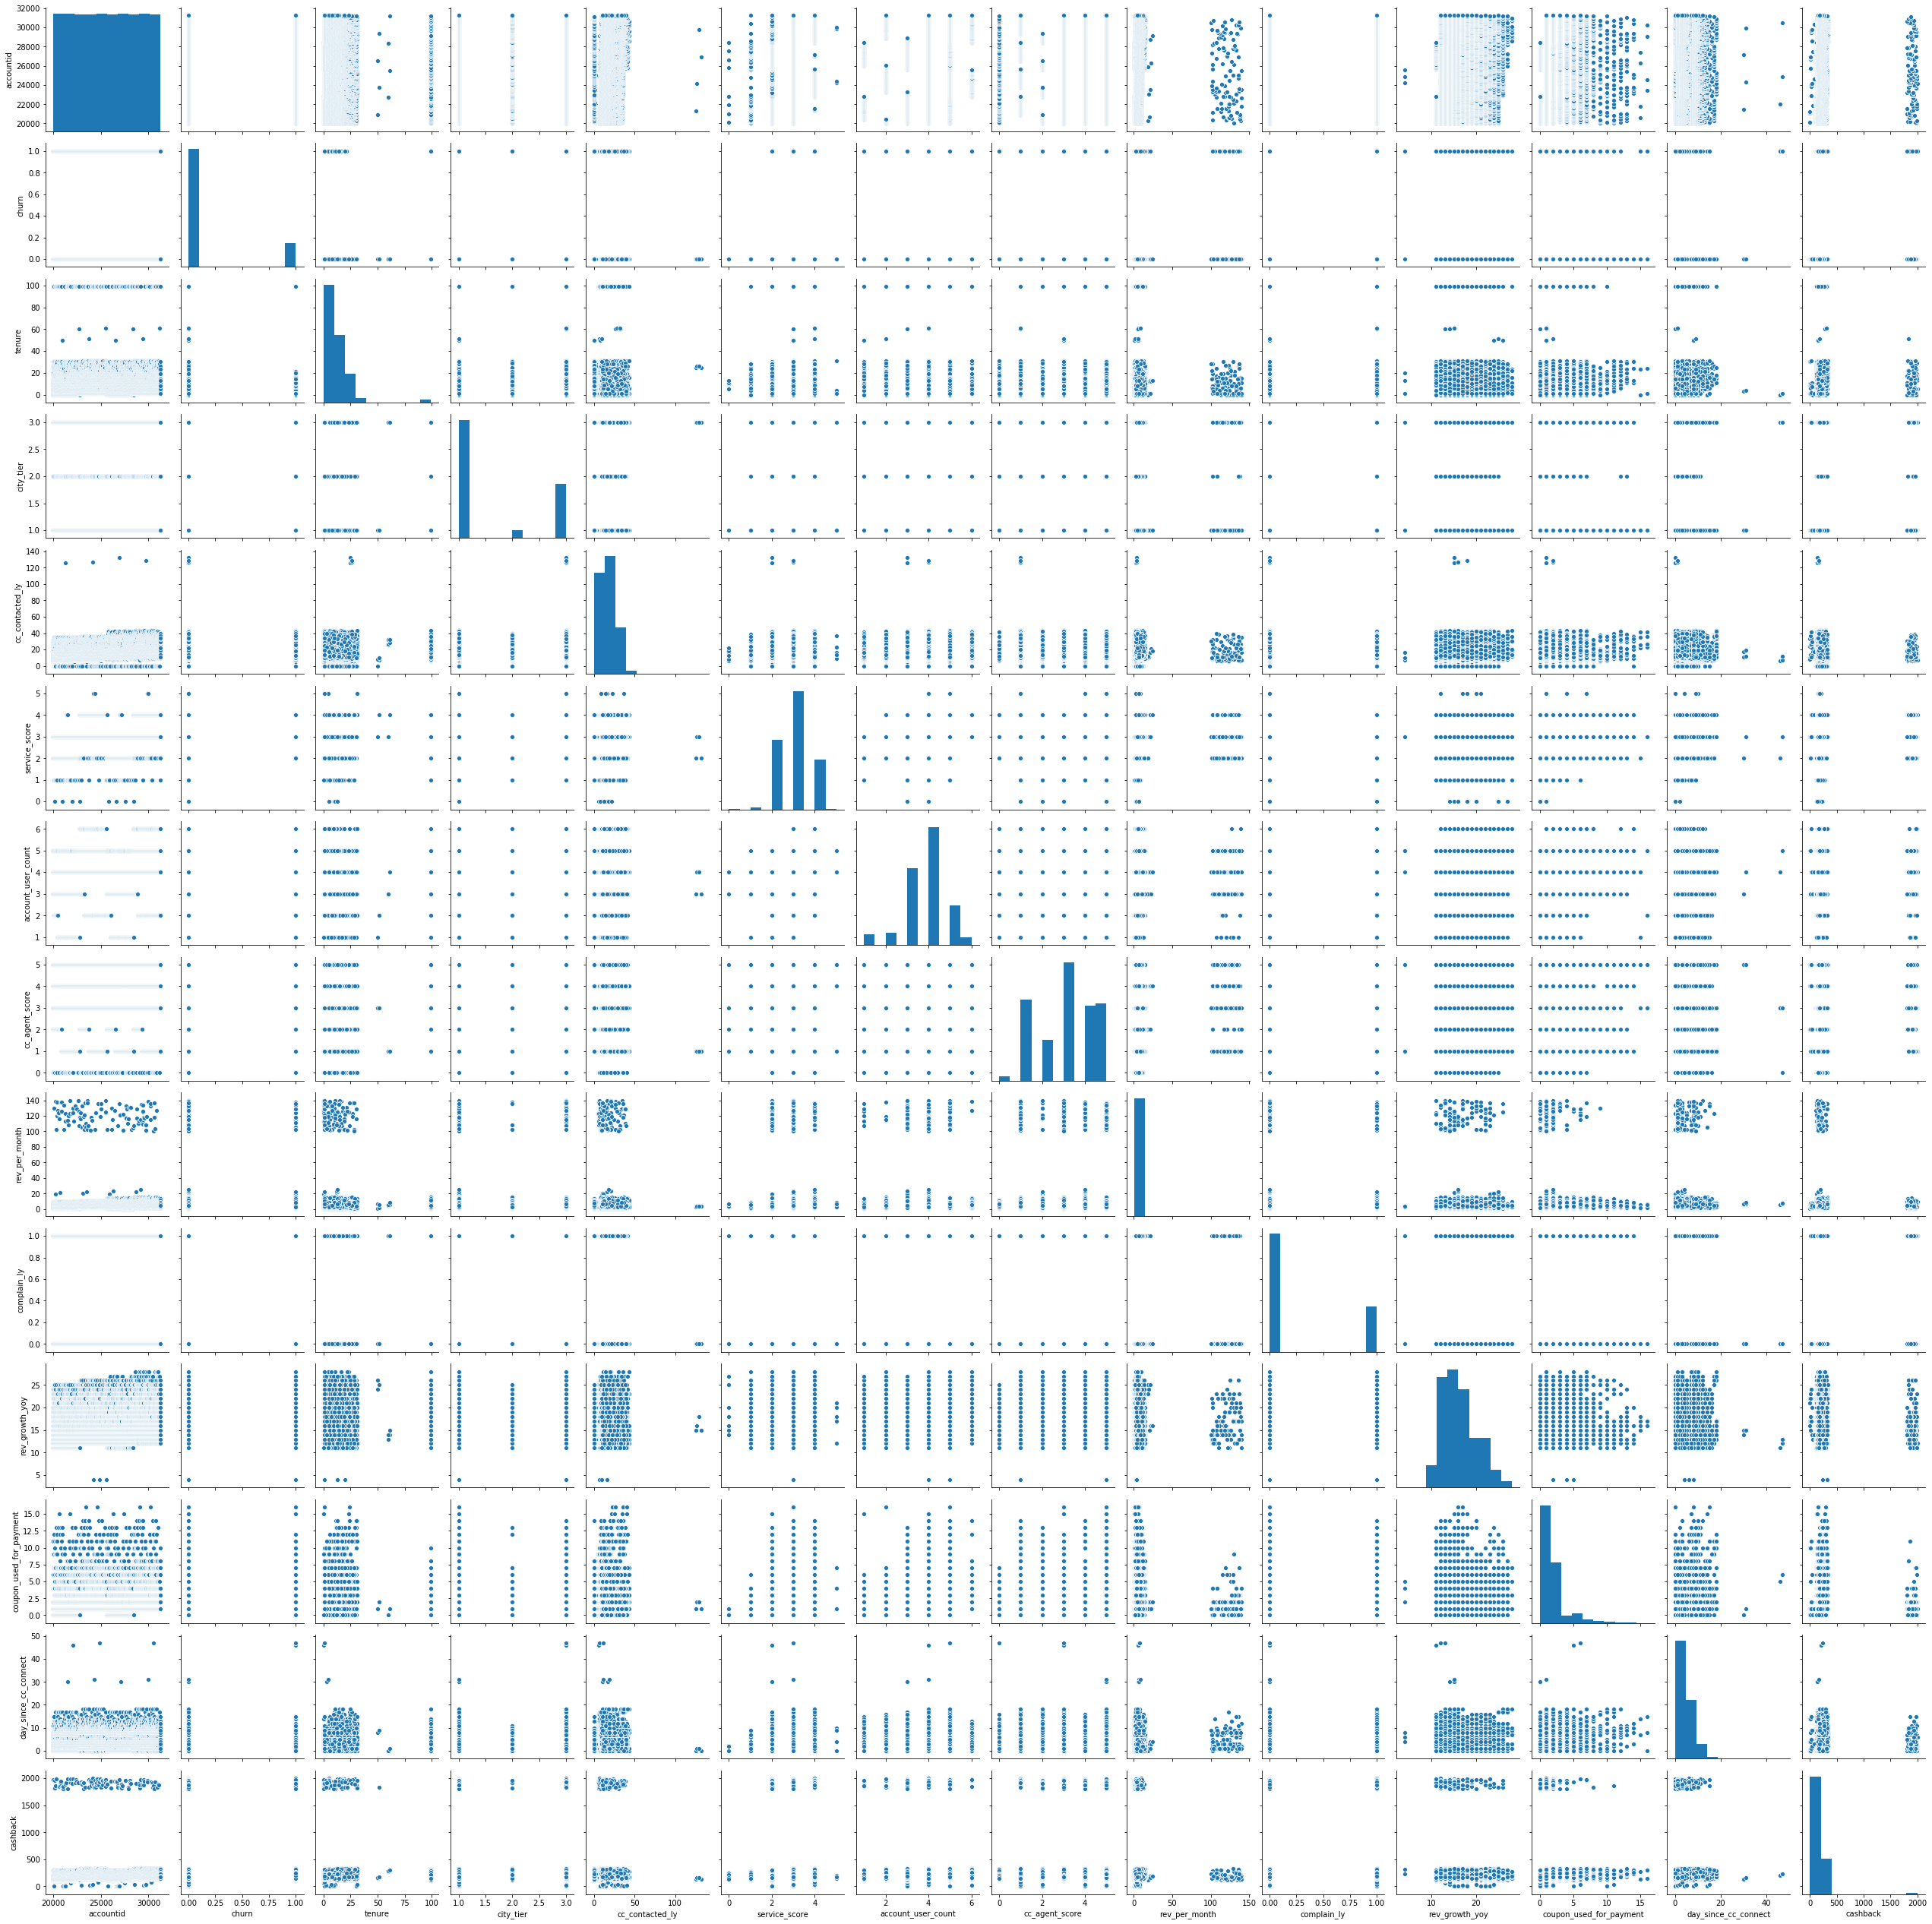

In [44]:
sns.pairplot(df_num)
plt.show()

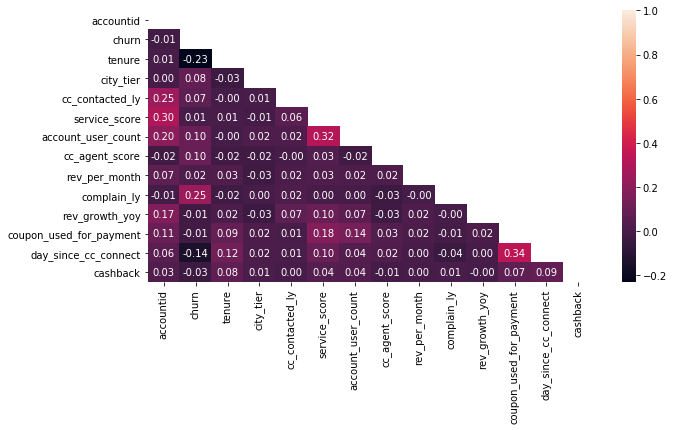

In [45]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

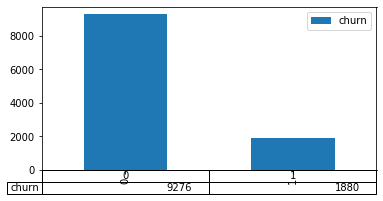

In [46]:
df["churn"].value_counts().plot(kind="bar", legend=True, figsize=(6,3), table=True)

In [47]:
df["churn"].value_counts()

0    9276
1    1880
Name: churn, dtype: int64

In [48]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  818
Cash on Delivery    1005
E wallet            1206
Credit Card         3470
Debit Card          4657
Name: payment, dtype: int64


GENDER :  2
Female    4409
Male      6747
Name: gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          517
Super Plus       807
HNI             1628
Super           4023
Regular Plus    4181
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1653
Single      3481
Married     6022
Name: marital_status, dtype: int64


LOGIN_DEVICE :  3
hybrid       441
Computer    3015
Mobile      7700
Name: login_device, dtype: int64




In [49]:
pd.crosstab(df.churn, df.account_segment, margins=True, margins_name="Total")

account_segment   HNI  Regular  Regular Plus  Super  Super Plus  Total
churn                                                                 
0                1373      477          3046   3612         768   9276
1                 255       40          1135    411          39   1880
Total            1628      517          4181   4023         807  11156

In [50]:
pd.crosstab(df.churn, df.payment, margins=True, margins_name="Total")

payment  Cash on Delivery  Credit Card  Debit Card  E wallet  UPI  Total
churn                                                                   
0                     753         2975        3940       932  676   9276
1                     252          495         717       274  142   1880
Total                1005         3470        4657      1206  818  11156

In [51]:
pd.crosstab(df.churn, df.gender, margins=True, margins_name="Total")

gender  Female  Male  Total
churn                      
0         3723  5553   9276
1          686  1194   1880
Total     4409  6747  11156

In [52]:
pd.crosstab(df.churn, df.marital_status, margins=True, margins_name="Total")

marital_status  Divorced  Married  Single  Total
churn                                           
0                   1412     5323    2541   9276
1                    241      699     940   1880
Total               1653     6022    3481  11156

In [53]:
pd.crosstab(df.churn, df.login_device, margins=True, margins_name="Total")

login_device  Computer  Mobile  hybrid  Total
churn                                        
0                 2418    6486     372   9276
1                  597    1214      69   1880
Total             3015    7700     441  11156

In [54]:
pd.crosstab(df.churn, df.city_tier, margins=True, margins_name="Total")

city_tier   1.0  2.0   3.0  Total
churn                            
0          6240  381  2655   9276
1          1064   95   721   1880
Total      7304  476  3376  11156

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accountid                11156 non-null  int64  
 1   churn                    11156 non-null  int64  
 2   tenure                   11156 non-null  float64
 3   city_tier                11156 non-null  float64
 4   cc_contacted_ly          11156 non-null  float64
 5   payment                  11156 non-null  object 
 6   gender                   11156 non-null  object 
 7   service_score            11156 non-null  float64
 8   account_user_count       11156 non-null  float64
 9   account_segment          11156 non-null  object 
 10  cc_agent_score           11156 non-null  float64
 11  marital_status           11156 non-null  object 
 12  rev_per_month            11156 non-null  float64
 13  complain_ly              11156 non-null  float64
 14  rev_growth_yoy        

In [57]:
df['payment']=df['payment'].astype('category')
df['gender']=df['gender'].astype('category')
df['account_segment']=df['account_segment'].astype('category')
df['city_tier']=df['city_tier'].astype('category')
df['marital_status']=df['marital_status'].astype('category')
df['login_device']=df['login_device'].astype('category')

In [58]:
df['payment_new']=df['payment'].cat.codes
df['gender_new']=df['gender'].cat.codes
df['account_segment_new']=df['account_segment'].cat.codes
df['city_tier_new']=df['city_tier'].cat.codes
df['marital_status_new']=df['marital_status'].cat.codes
df['login_device_new']=df['login_device'].cat.codes

In [59]:
enc=OneHotEncoder()

In [60]:
enc_df=pd.DataFrame(enc.fit_transform(df[['payment_new','gender_new','account_segment_new','city_tier_new','marital_status_new','login_device_new']]).toarray())

In [61]:
New_df=df.join(enc_df)

In [62]:
print(New_df)

       accountid  churn  tenure city_tier  cc_contacted_ly      payment  \
0          20000      1     4.0       3.0              6.0   Debit Card   
1          20001      1     0.0       1.0              8.0          UPI   
2          20002      1     0.0       1.0             30.0   Debit Card   
3          20003      1     0.0       3.0             15.0   Debit Card   
4          20004      1     0.0       1.0             12.0  Credit Card   
...          ...    ...     ...       ...              ...          ...   
11255      31255      0    10.0       1.0             34.0  Credit Card   
11256      31256      0    13.0       1.0             19.0  Credit Card   
11257      31257      0     1.0       1.0             14.0   Debit Card   
11258      31258      0    23.0       3.0             11.0  Credit Card   
11259      31259      0     8.0       1.0             22.0  Credit Card   

       gender  service_score  account_user_count account_segment  ...   11  \
0      Female        

In [63]:
New_df.head()

accountid  churn  tenure city_tier  cc_contacted_ly      payment  gender  \
0      20000      1     4.0       3.0              6.0   Debit Card  Female   
1      20001      1     0.0       1.0              8.0          UPI    Male   
2      20002      1     0.0       1.0             30.0   Debit Card    Male   
3      20003      1     0.0       3.0             15.0   Debit Card    Male   
4      20004      1     0.0       1.0             12.0  Credit Card    Male   

   service_score  account_user_count account_segment  ...   11   12   13   14  \
0            3.0                 3.0           Super  ...  0.0  0.0  0.0  1.0   
1            3.0                 4.0    Regular Plus  ...  0.0  1.0  0.0  0.0   
2            2.0                 4.0    Regular Plus  ...  0.0  1.0  0.0  0.0   
3            2.0                 4.0           Super  ...  0.0  0.0  0.0  1.0   
4            2.0                 3.0    Regular Plus  ...  0.0  1.0  0.0  0.0   

    15   16   17   18   19   20  
0  0.0  0.0  1.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  1.0  0.0  
3  0.0  0.0  1.0  0.0  1.0  0.0  
4  0.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 46 columns]

In [64]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11259
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   accountid                11156 non-null  int64   
 1   churn                    11156 non-null  int64   
 2   tenure                   11156 non-null  float64 
 3   city_tier                11156 non-null  category
 4   cc_contacted_ly          11156 non-null  float64 
 5   payment                  11156 non-null  category
 6   gender                   11156 non-null  category
 7   service_score            11156 non-null  float64 
 8   account_user_count       11156 non-null  float64 
 9   account_segment          11156 non-null  category
 10  cc_agent_score           11156 non-null  float64 
 11  marital_status           11156 non-null  category
 12  rev_per_month            11156 non-null  float64 
 13  complain_ly              11156 non-null  float64 
 14  rev_gr

In [65]:
new_df = pd.get_dummies(df, columns = ['payment','gender','account_segment','city_tier','marital_status','login_device'])
print(new_df)

       accountid  churn  tenure  cc_contacted_ly  service_score  \
0          20000      1     4.0              6.0            3.0   
1          20001      1     0.0              8.0            3.0   
2          20002      1     0.0             30.0            2.0   
3          20003      1     0.0             15.0            2.0   
4          20004      1     0.0             12.0            2.0   
...          ...    ...     ...              ...            ...   
11255      31255      0    10.0             34.0            3.0   
11256      31256      0    13.0             19.0            3.0   
11257      31257      0     1.0             14.0            3.0   
11258      31258      0    23.0             11.0            4.0   
11259      31259      0     8.0             22.0            3.0   

       account_user_count  cc_agent_score  rev_per_month  complain_ly  \
0                     3.0             2.0            9.0          1.0   
1                     4.0             3.0        

In [66]:
new_df.head()

accountid  churn  tenure  cc_contacted_ly  service_score  \
0      20000      1     4.0              6.0            3.0   
1      20001      1     0.0              8.0            3.0   
2      20002      1     0.0             30.0            2.0   
3      20003      1     0.0             15.0            2.0   
4      20004      1     0.0             12.0            2.0   

   account_user_count  cc_agent_score  rev_per_month  complain_ly  \
0                 3.0             2.0            9.0          1.0   
1                 4.0             3.0            7.0          1.0   
2                 4.0             3.0            6.0          1.0   
3                 4.0             5.0            8.0          0.0   
4                 3.0             5.0            3.0          0.0   

   rev_growth_yoy  ...  account_segment_Super Plus  city_tier_1.0  \
0            11.0  ...                           0              0   
1            15.0  ...                           0              1   
2            14.0  ...                           0              1   
3            23.0  ...                           0              0   
4            11.0  ...                           0              1   

   city_tier_2.0  city_tier_3.0  marital_status_Divorced  \
0              0              1                        0   
1              0              0                        0   
2              0              0                        0   
3              0              1                        0   
4              0              0                        0   

   marital_status_Married  marital_status_Single  login_device_Computer  \
0                       0                      1                      0   
1                       0                      1                      0   
2                       0                      1                      0   
3                       0                      1                      0   
4                       0                      1                      0   

   login_device_Mobile  login_device_hybrid  
0                    1                    0  
1                    1                    0  
2                    1                    0  
3                    1                    0  
4                    1                    0  

[5 rows x 40 columns]

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11156 entries, 0 to 11259
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accountid                     11156 non-null  int64  
 1   churn                         11156 non-null  int64  
 2   tenure                        11156 non-null  float64
 3   cc_contacted_ly               11156 non-null  float64
 4   service_score                 11156 non-null  float64
 5   account_user_count            11156 non-null  float64
 6   cc_agent_score                11156 non-null  float64
 7   rev_per_month                 11156 non-null  float64
 8   complain_ly                   11156 non-null  float64
 9   rev_growth_yoy                11156 non-null  float64
 10  coupon_used_for_payment       11156 non-null  float64
 11  day_since_cc_connect          11156 non-null  float64
 12  cashback                      11156 non-null  float64
 13  p

### Following are the 5 models that can be built on new_df

1) Descison Tree

2) Random Forest Classifier

3) Artificial Neural Networks

4) Logistic Regression

5) Linear Discriminant Analysis

### Splitting Dataset into Train & Test

In [69]:
x=new_df.drop(['churn','accountid'],axis=1)
y=new_df.churn

In [70]:
x_train,x_test,train_labels, test_labels=train_test_split(x,y,random_state=7,test_size=0.30)

In [71]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,10,15,30,50,100,200,500],
    'min_samples_leaf': [3,10,15,30,50,100,200,500],
    'min_samples_split': [3,10,15,30,50,100,200,500],
}

dtcl=DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,train_labels)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [73]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [74]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [75]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                   Imp
tenure                        0.358863
day_since_cc_connect          0.068997
complain_ly                   0.062487
cc_agent_score                0.048330
cashback                      0.046844
cc_contacted_ly               0.043996
rev_growth_yoy                0.043782
rev_per_month                 0.042395
marital_status_Single         0.028407
account_user_count            0.028314
account_segment_new           0.026184
login_device_new              0.023795
payment_new                   0.017949
login_device_Mobile           0.014634
payment_Credit Card           0.014496
coupon_used_for_payment       0.014266
city_tier_1.0                 0.011741
payment_Debit Card            0.011029
city_tier_new                 0.009870
login_device_Computer         0.009115
marital_status_Married        0.009052
marital_status_new            0.008556
payment_E wallet              0.007388
city_tier_2.0                 0.007271
account_segment_Regular P

In [76]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [77]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

0         1
0  1.000000  0.000000
1  0.666667  0.333333
2  1.000000  0.000000
3  1.000000  0.000000
4  1.000000  0.000000

AUC: 0.998


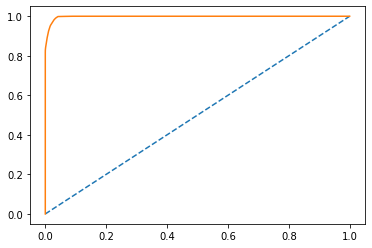

In [78]:
# predict probabilities_DTCL_TRAIN
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dtcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dtcl_train_auc)
# calculate roc curve
dtcl_train_fpr, dtcl_train_tpr, dtcl_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtcl_train_fpr, dtcl_train_tpr)

AUC: 0.919


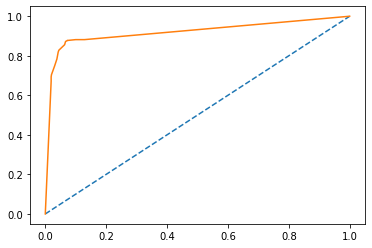

In [79]:
# predict probabilities_DTCL_TEST
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dtcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % dtcl_test_auc)
# calculate roc curve
dtcl_test_fpr, dtcl_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtcl_test_fpr, dtcl_test_tpr)

## Confusion Matrix for the training data _DTCL

In [81]:
confusion_matrix(train_labels, ytrain_predict)

array([[6400,   70],
       [ 100, 1239]], dtype=int64)

In [82]:
#Train Data Accuracy
dtcl_train_acc=best_grid.score(x_train,train_labels) 
dtcl_train_acc

0.9782302471507235

In [83]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6470
           1       0.95      0.93      0.94      1339

    accuracy                           0.98      7809
   macro avg       0.97      0.96      0.96      7809
weighted avg       0.98      0.98      0.98      7809



In [84]:
dtcl_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_train_f1=round(df.loc["1"][2],2)
dtcl_train_recall=round(df.loc["1"][1],2)
dtcl_train_precision=round(df.loc["1"][0],2)
print ('dtcl_train_precision ',dtcl_train_precision)
print ('dtcl_train_recall ',dtcl_train_recall)
print ('dtcl_train_f1 ',dtcl_train_f1)

dtcl_train_precision  0.95
dtcl_train_recall  0.93
dtcl_train_f1  0.94


### Confusion Matrix for test data_DTCL

In [85]:
confusion_matrix(test_labels, ytest_predict)

array([[2699,  107],
       [ 117,  424]], dtype=int64)

In [86]:
#Test Data Accuracy
dtcl_test_acc=best_grid.score(x_test,test_labels)
dtcl_test_acc

0.9330743949805796

In [87]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2806
           1       0.80      0.78      0.79       541

    accuracy                           0.93      3347
   macro avg       0.88      0.87      0.88      3347
weighted avg       0.93      0.93      0.93      3347



In [88]:
dtcl_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_test_precision=round(df.loc["1"][0],2)
dtcl_test_recall=round(df.loc["1"][1],2)
dtcl_test_f1=round(df.loc["1"][2],2)
print ('dtcl_test_precision ',dtcl_test_precision)
print ('dtcl_test_recall ',dtcl_test_recall)
print ('dtcl_test_f1 ',dtcl_test_f1)

dtcl_test_precision  0.8
dtcl_test_recall  0.78
dtcl_test_f1  0.79


## Building a Random Forest Classifier

In [90]:
####Grid Search for finding out the optimal values for the hyper parameters

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'max_depth': [10,15,30],
    'max_features': [8,9,10],
    'min_samples_leaf': [3], 
    'min_samples_split': [3], 
    'n_estimators': [300] 
}

rfcl = RandomForestClassifier(random_state=7)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [93]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [94]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [95]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [96]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                   Imp
tenure                        0.291803
complain_ly                   0.077723
cashback                      0.057537
day_since_cc_connect          0.056661
cc_agent_score                0.054618
cc_contacted_ly               0.053876
rev_per_month                 0.048798
rev_growth_yoy                0.046369
account_user_count            0.026813
payment_new                   0.023873
account_segment_Regular Plus  0.021223
coupon_used_for_payment       0.019566
account_segment_new           0.018914
marital_status_new            0.017739
marital_status_Single         0.015419
city_tier_new                 0.013459
payment_Credit Card           0.012651
service_score                 0.011567
payment_Debit Card            0.010470
city_tier_3.0                 0.009962
login_device_Computer         0.009859
login_device_new              0.009777
login_device_Mobile           0.009429
city_tier_1.0                 0.009260
gender_new               

In [97]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [98]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.971466  0.028534
1  0.763234  0.236766
2  0.905099  0.094901
3  0.923427  0.076573
4  0.993540  0.006460

AUC: 1.000


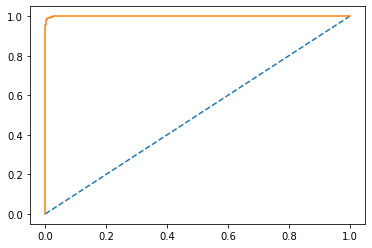

In [99]:
# predict probabilities_RFCL_TRAIN
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rfcl_train_auc)
# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr)

AUC: 0.989


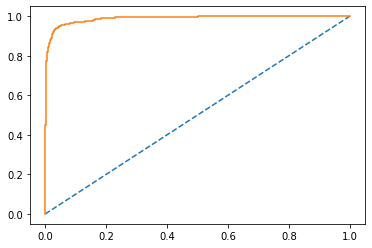

In [100]:
# predict probabilities_RFCL_TEST
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rfcl_test_auc)
# calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr)

## Confusion Matrix for the training data _RFCL

In [101]:
confusion_matrix(train_labels, ytrain_predict)

array([[6467,    3],
       [  71, 1268]], dtype=int64)

In [102]:
#Train Data Accuracy
rfcl_train_acc=best_grid.score(x_train,train_labels) 
rfcl_train_acc

0.9905237546420796

In [103]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6470
           1       1.00      0.95      0.97      1339

    accuracy                           0.99      7809
   macro avg       0.99      0.97      0.98      7809
weighted avg       0.99      0.99      0.99      7809



In [104]:
rfcl_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_f1=round(df.loc["1"][2],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_precision=round(df.loc["1"][0],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)

rfcl_train_precision  1.0
rfcl_train_recall  0.95
rfcl_train_f1  0.97


### Confusion Matrix for test data_RFCL

In [105]:
confusion_matrix(test_labels, ytest_predict)

array([[2786,   20],
       [ 101,  440]], dtype=int64)

In [106]:
#Test Data Accuracy
rfcl_test_acc=best_grid.score(x_test,test_labels)
rfcl_test_acc

0.9638482222886167

In [107]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2806
           1       0.96      0.81      0.88       541

    accuracy                           0.96      3347
   macro avg       0.96      0.90      0.93      3347
weighted avg       0.96      0.96      0.96      3347



In [108]:
rfcl_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_test_precision  0.96
rfcl_test_recall  0.81
rfcl_test_f1  0.88


# Building a Neural Network Classifier

In [109]:
param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,5000,10000], #5000,2500
    'solver': ['adam','sgd'],
    "activation": ["tanh", "relu"],
    'tol': [0.001], 
}

nncl = MLPClassifier(random_state=7)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [110]:
grid_search.fit(x_train, train_labels)
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 200,
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.001}

In [111]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=7, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [112]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

## NN Model Performance Evaluation on Training data

In [113]:
confusion_matrix(train_labels,ytrain_predict)

array([[6428,   42],
       [ 133, 1206]], dtype=int64)

In [114]:
nn_train_acc=best_grid.score(x_train,train_labels) 
nn_train_acc

0.9775899603022153

In [115]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6470
           1       0.97      0.90      0.93      1339

    accuracy                           0.98      7809
   macro avg       0.97      0.95      0.96      7809
weighted avg       0.98      0.98      0.98      7809



In [116]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.97
nn_train_recall  0.9
nn_train_f1  0.93


Area under Curve is 0.9950506329552262


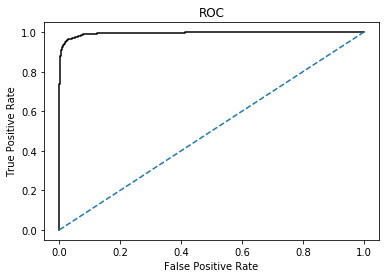

In [117]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [118]:
confusion_matrix(test_labels,ytest_predict)

array([[2744,   62],
       [  98,  443]], dtype=int64)

In [119]:
nn_test_acc=best_grid.score(x_test,test_labels)
nn_test_acc

0.9521959964146998

In [120]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2806
           1       0.88      0.82      0.85       541

    accuracy                           0.95      3347
   macro avg       0.92      0.90      0.91      3347
weighted avg       0.95      0.95      0.95      3347



In [121]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.88
nn_test_recall  0.82
nn_test_f1  0.85


Area under Curve is 0.9733532448950821


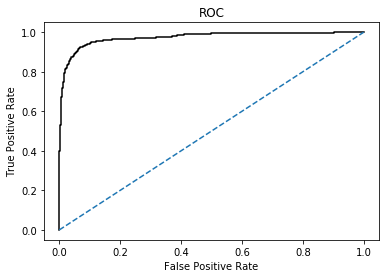

In [122]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)

## Logistic Regression Model

In [123]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton-cg', 'saga'],
      'tol':[0.0001,0.00001]}

In [124]:
lr = LogisticRegression(max_iter=10000,n_jobs=2)

In [125]:
grid_search = GridSearchCV(estimator = lr, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [126]:
grid_search.fit(x_train, train_labels)
grid_search.best_params_

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [127]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

# LR Model Performance Evaluation on Training data

In [129]:
confusion_matrix(train_labels,ytrain_predict)

array([[6307,  163],
       [ 760,  579]], dtype=int64)

In [130]:
lr_train_acc=best_grid.score(x_train,train_labels) 
lr_train_acc

0.8818030477653989

In [131]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6470
           1       0.78      0.43      0.56      1339

    accuracy                           0.88      7809
   macro avg       0.84      0.70      0.74      7809
weighted avg       0.87      0.88      0.87      7809



In [132]:
lr_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.78
lr_train_recall  0.43
lr_train_f1  0.56


Area under Curve is 0.8681556630071808


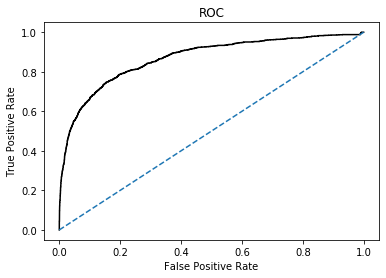

In [133]:
lr_train_fpr, lr_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(lr_train_fpr,lr_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', lr_train_auc)

## LR Model Performance Evaluation on Test data

In [134]:
confusion_matrix(test_labels,ytest_predict)

array([[2738,   68],
       [ 306,  235]], dtype=int64)

In [135]:
lr_test_acc=best_grid.score(x_test,test_labels)
lr_test_acc

0.8882581416193607

In [136]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2806
           1       0.78      0.43      0.56       541

    accuracy                           0.89      3347
   macro avg       0.84      0.71      0.75      3347
weighted avg       0.88      0.89      0.87      3347



In [137]:
lr_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.78
lr_test_recall  0.43
lr_test_f1  0.56


Area under Curve is 0.8588856991158371


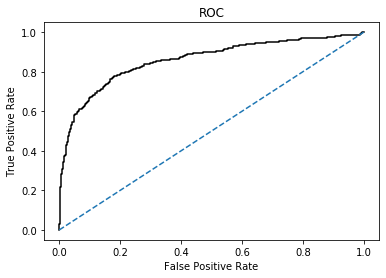

In [138]:
lr_test_fpr, lr_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(lr_test_fpr,lr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', lr_test_auc)

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA Model

In [141]:
grid={'solver':['svd','lsqr','eigen'],
      'tol':[0.0001,0.00001]}

In [142]:
lda = LinearDiscriminantAnalysis()

In [143]:
grid_search = GridSearchCV(estimator = lda, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [144]:
grid_search.fit(x_train, train_labels)
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.0001}

In [145]:
best_grid = grid_search.best_estimator_
best_grid

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [146]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

## LDA Model Performance Evaluation on Training data

In [147]:
confusion_matrix(train_labels,ytrain_predict)

array([[6277,  193],
       [ 850,  489]], dtype=int64)

In [148]:
lda_train_acc=best_grid.score(x_train,train_labels) 
lda_train_acc

0.8664361634012038

In [149]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6470
           1       0.72      0.37      0.48      1339

    accuracy                           0.87      7809
   macro avg       0.80      0.67      0.70      7809
weighted avg       0.85      0.87      0.85      7809



In [150]:
lda_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.72
lda_train_recall  0.37
lda_train_f1  0.48


Area under Curve is 0.8399336052072356


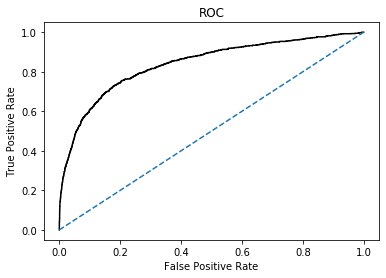

In [151]:
lda_train_fpr, lda_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(lda_train_fpr,lda_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', lda_train_auc)

## LDA Model Performance Evaluation on Test data

In [152]:
confusion_matrix(test_labels,ytest_predict)

array([[2726,   80],
       [ 336,  205]], dtype=int64)

In [153]:
lda_test_acc=best_grid.score(x_test,test_labels)
lda_test_acc

0.8757095906782193

In [154]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2806
           1       0.72      0.38      0.50       541

    accuracy                           0.88      3347
   macro avg       0.80      0.68      0.71      3347
weighted avg       0.86      0.88      0.86      3347



In [155]:
lda_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.72
lda_test_recall  0.38
lda_test_f1  0.5


Area under Curve is 0.8331769920015598


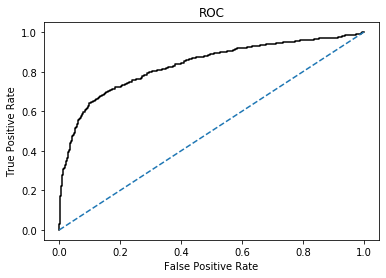

In [156]:
lda_test_fpr, lda_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(lda_test_fpr,lda_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', lda_test_auc)

# Final Conclusion

## Comparison of the performance metrics from the 5 models

In [157]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[dtcl_train_acc,dtcl_train_auc,dtcl_train_recall,dtcl_train_precision,dtcl_train_f1],
        'Decision Tree Test':[dtcl_test_acc,dtcl_test_auc,dtcl_test_recall,dtcl_test_precision,dtcl_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
       'Logistic Regression Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logistic Regression Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
                    },index=index)
round(data,2)

Decision Tree Train  Decision Tree Test  Random Forest Train  \
Accuracy                  0.98                0.93                 0.99   
AUC                       1.00                0.92                 1.00   
Recall                    0.93                0.78                 0.95   
Precision                 0.95                0.80                 1.00   
F1 Score                  0.94                0.79                 0.97   

           Random Forest Test  Neural Network Train  Neural Network Test  \
Accuracy                 0.96                  0.98                 0.95   
AUC                      0.99                  1.00                 0.97   
Recall                   0.81                  0.90                 0.82   
Precision                0.96                  0.97                 0.88   
F1 Score                 0.88                  0.93                 0.85   

           Logistic Regression Train  Logistic Regression Test  LDA Train  \
Accuracy                        0.88                      0.89       0.87   
AUC                             0.87                      0.86       0.84   
Recall                          0.43                      0.43       0.37   
Precision                       0.78                      0.78       0.72   
F1 Score                        0.56                      0.56       0.48   

           LDA Test  
Accuracy       0.88  
AUC            0.83  
Recall         0.38  
Precision      0.72  
F1 Score       0.50

# ROC Curve for the 5 models on the Training data

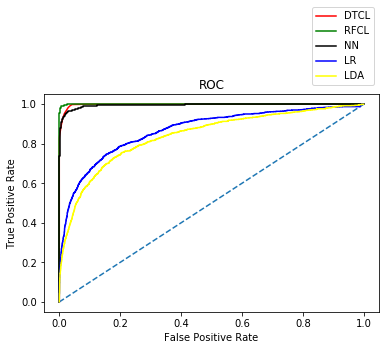

In [158]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr,color='red',label="DTCL")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RFCL")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.plot(lr_train_fpr,lr_train_tpr,color='blue',label="LR")
plt.plot(lda_train_fpr,lda_train_tpr,color='yellow',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 5 models on the Testing data

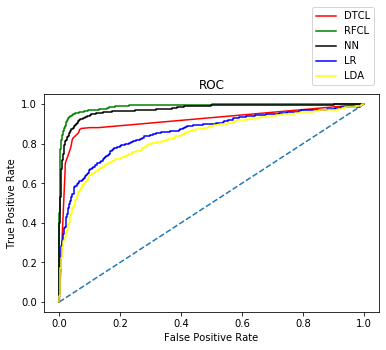

In [159]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr,color='red',label="DTCL")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RFCL")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.plot(lr_test_fpr,lr_test_tpr,color='blue',label="LR")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')